In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Credit card transactions - India - Simple.csv", index_col='index')

In [3]:
df.head()

,City,Date,Card Type,Exp Type,Gender,Amount
index,,,,,,
0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


In [4]:
df.shape

(26052, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26052 entries, 0 to 26051
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   City       26052 non-null  object
 1   Date       26052 non-null  object
 2   Card Type  26052 non-null  object
 3   Exp Type   26052 non-null  object
 4   Gender     26052 non-null  object
 5   Amount     26052 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


In [7]:
Card_Type = df['Card Type'].unique()
print('Card Types = ', Card_Type)
Exp_Type = df['Exp Type'].unique()
print('Expense Types = ', Exp_Type)
City = len(df['City'].unique())
print('Cities = ', City)

Card Types =  ['Gold' 'Platinum' 'Silver' 'Signature']
Expense Types =  ['Bills' 'Food' 'Entertainment' 'Grocery' 'Fuel' 'Travel']
Cities =  986


In [8]:
df.duplicated().sum()

0

In [9]:
df["Date"]=pd.to_datetime(df["Date"])
df.dtypes

City                 object
Date         datetime64[ns]
Card Type            object
Exp Type             object
Gender               object
Amount                int64
dtype: object

Q1. Which card type is most popular ?

In [10]:
p_card =df["Card Type"].value_counts()
p_card

Silver       6840
Signature    6447
Platinum     6398
Gold         6367
Name: Card Type, dtype: int64

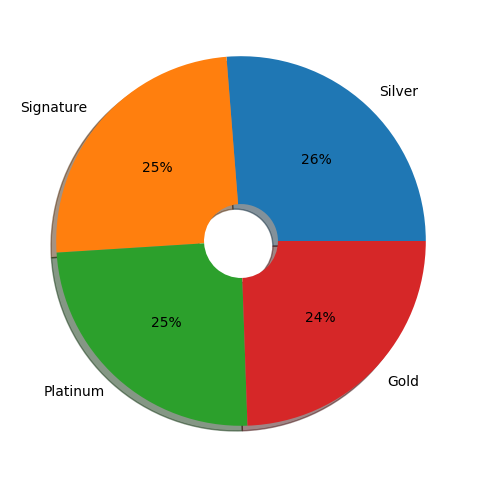

In [11]:
plt.figure(figsize=(6,6))
l=["Silver","Signature","Platinum","Gold"]
plt.pie(p_card,labels=l,shadow=True,autopct="%0.0f%%",textprops={'fontsize': 10},wedgeprops={"width":0.8})
plt.show()

Answer: Silver card type is the most popular



Q2. Which expense type is most popular ?



In [12]:
p_exp = df['Exp Type'].value_counts()
p_exp

Food             5463
Fuel             5257
Bills            5078
Entertainment    4762
Grocery          4754
Travel            738
Name: Exp Type, dtype: int64

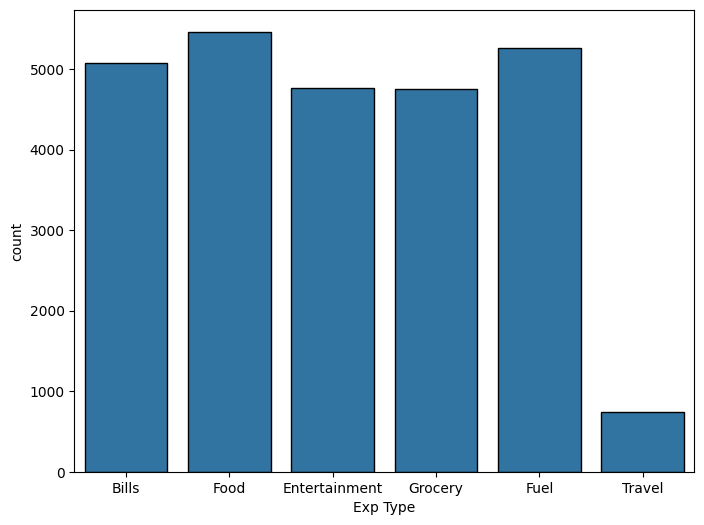

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(x ="Exp Type",data=df,edgecolor="black")
plt.show()

Answer: Food Expense type is the most popular.

Q3. Which gender spend more in Credit Card?

In [14]:
m_gen = df["Gender"].value_counts()
m_gen

F    13680
M    12372
Name: Gender, dtype: int64

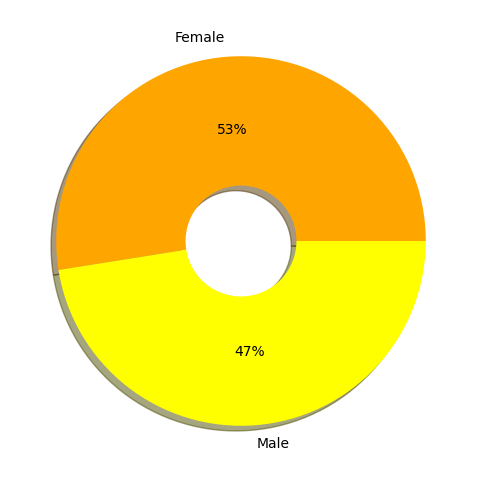

In [15]:
plt.figure(figsize=(6,6))
gen = ["Female","Male"]
plt.pie(m_gen,labels=gen,shadow=True,autopct="%0.0f%%",textprops={"fontsize":10},colors=["orange","yellow"],wedgeprops={'width': 0.7})
plt.show()

Answer: Female spends more in credit cards.

Q4. In which month of the year credit card usage is the highest.

In [16]:
df["Month"] = df["Date"].dt.month_name()
p_mnth = df["Month"].value_counts()
p_mnth

January      2722
December     2702
October      2665
March        2622
November     2622
April        2587
May          2436
February     2433
August       1393
September    1321
July         1310
June         1239
Name: Month, dtype: int64

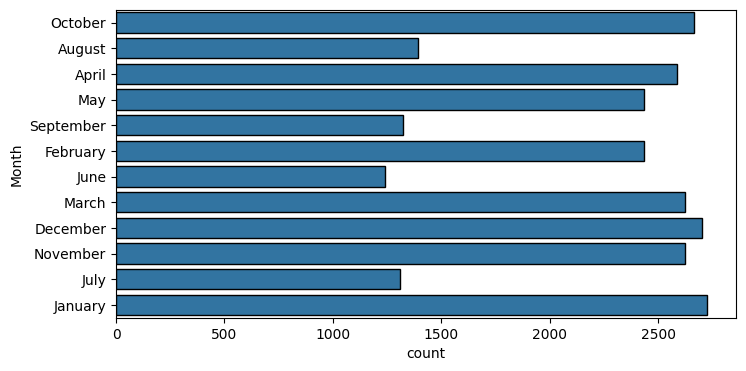

In [17]:
plt.figure(figsize=(8,4))
sns.countplot(y="Month",data=df,edgecolor="black")
plt.show()

Answer: January is the peak month for credit card usage.

Q5. Find top 5 cities of India which all spended credit card maximum .

In [18]:
max_city = pd.DataFrame(df['City'].value_counts())[0:5]
max_city

,City
"Bengaluru, India",3552
"Greater Mumbai, India",3493
"Ahmedabad, India",3491
"Delhi, India",3482
"Hyderabad, India",784


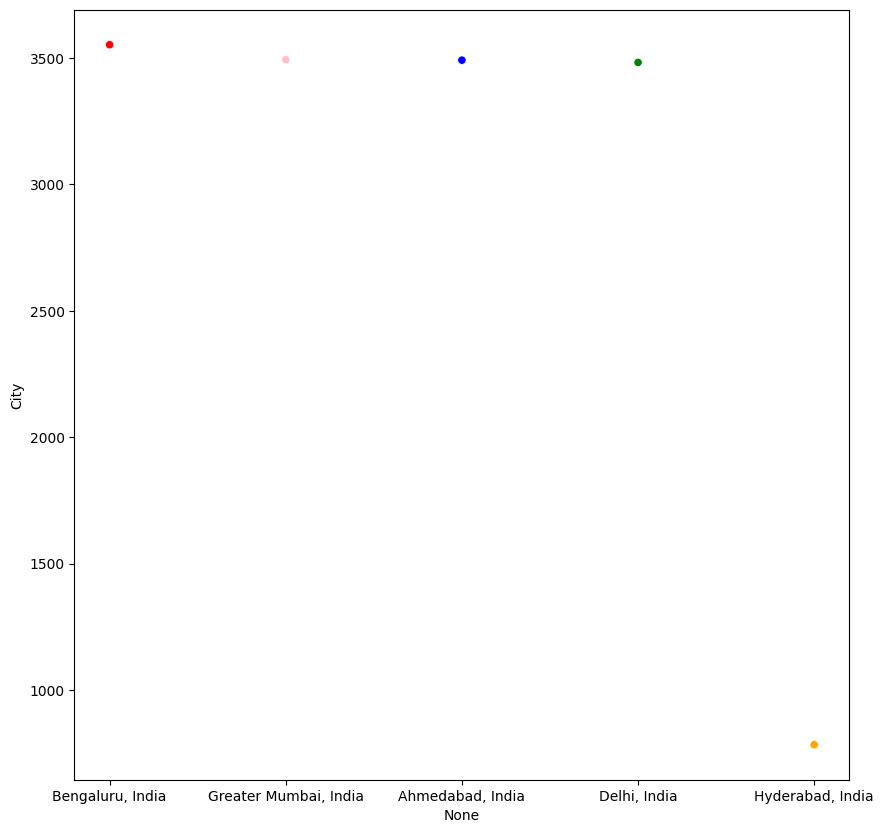

In [19]:
plt.figure(figsize=(10,10))
colors = np.array(["red","pink","blue","green","orange"])
sns.scatterplot(max_city, x=max_city.index, y='City',c=colors)
plt.show()

Q6. Which card type were mostly used by the Males and Females?

In [20]:
card_gen = pd.DataFrame(df.groupby('Gender')['Card Type'].value_counts())
card_gen

Card Type
Gender Card Type           
F      Silver          3773
       Signature       3368
       Gold            3287
       Platinum        3252
M      Platinum        3146
       Gold            3080
       Signature       3079
       Silver          3067

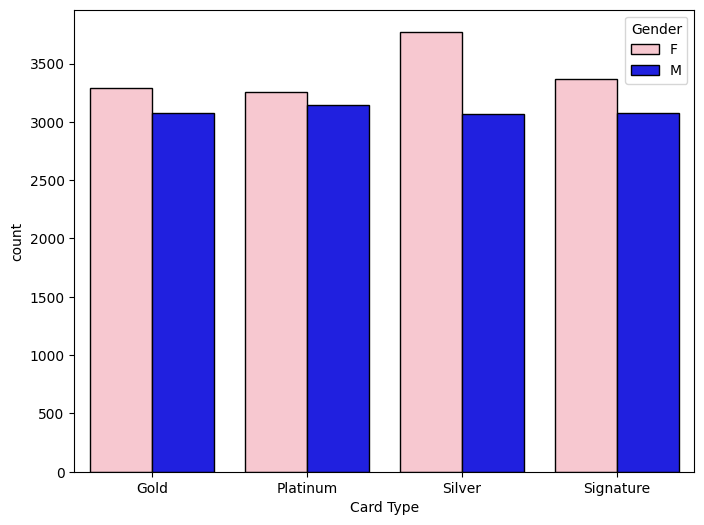

In [21]:
plt.figure(figsize=(8,6))
sns.countplot(x="Card Type",hue="Gender",data=df,palette=["pink","blue"],edgecolor="black")
plt.show()

Answer: Females used the Silver card type where as Males have used the platinum card types more.

Q7.Find out the expenses of credit card of Males and Females monthwise

In [22]:
exp_m_g = df.groupby(['Gender','Month'])['Amount'].sum()
exp_m_g

Gender  Month    
F       April        225640906
        August       114659155
        December     220813597
        February     210401905
        January      227700168
        July         106087028
        June         100563540
        March        225659403
        May          211850293
        November     217110069
        October      230188235
        September    114636731
M       April        190753828
        August       103793971
        December     196121818
        February     173110719
        January      203509388
        July          91894388
        June          90757499
        March        184395043
        May          163605316
        November     186997899
        October      189657772
        September     94924702
Name: Amount, dtype: int64

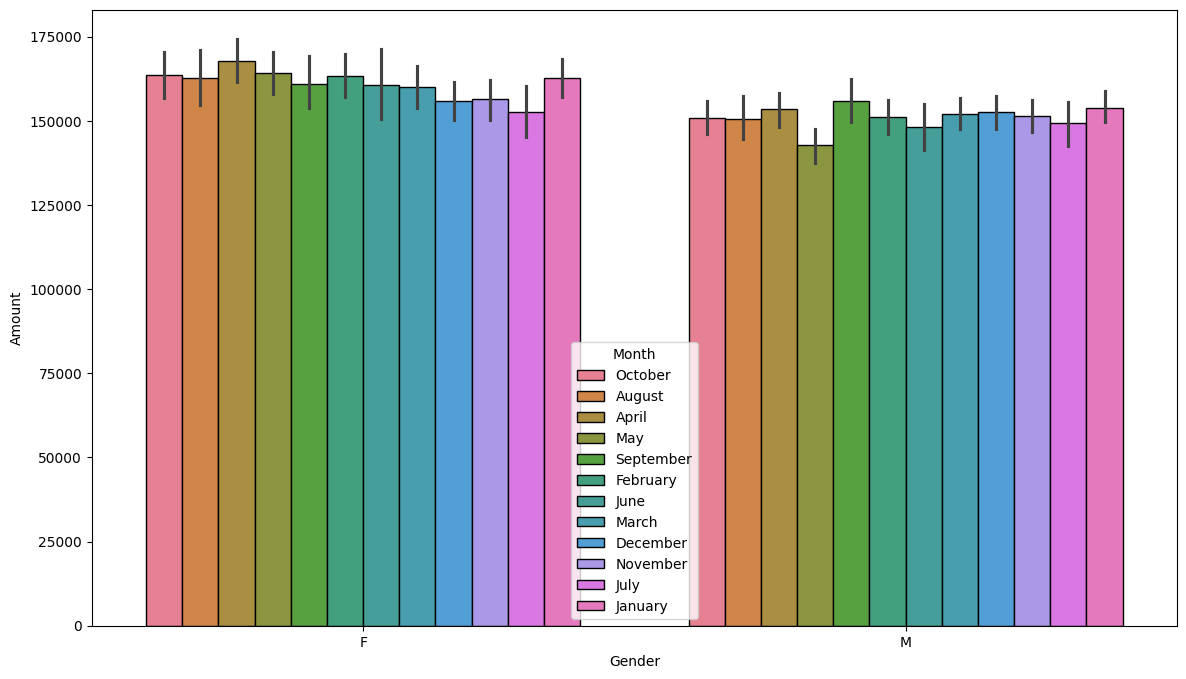

In [23]:
plt.figure(figsize=(14,8))
sns.barplot(x="Gender",y="Amount",hue="Month",data=df,edgecolor="black")
plt.show()

In [24]:
df.to_csv("Credit Card Spending Habits.csv")

Conclusion
Silver was most popular card type .
In Fuel and Food expenses were most counts paid by the cards.
In January and December there is high usage of cards payments.
Bengaluru,Greater Mumbai, Ahmedabad, and Delhi were the Top 4 Cities.
Females used the Silver card type where as Male used the platinum card type more.
Females were more depend on credit cards as they spend more amount on credit cards than men.
Females mostly spend in October and Males in january using credit cards.